Modification of the 1st version: Add construction period...investment ramped linearly over the construction period

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [72]:
def NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price):
    prod=cf*1*365*24
    constructiont=int(round(construction_period))
    It=np.zeros(n+constructiont)
    #It[0]=It0
    Mt=np.ones(n+constructiont)*(OMkwh*prod+OMfixed)
    Et=np.ones(n+constructiont)*prod  #kwH
    for x in range(constructiont):
        It[x]=It0/constructiont  #spread the investment evenly over the construction period
        Mt[x]=0   #No costs or production during construction
        Et[x]=0
    discounted_benefits=0.0
    discounted_costs=0.0
    for x in range(n+constructiont):
        t=x
        benefit=Et[x]*(wholesale_price/1000)/np.power((1+r),t)
        cost=(It[x]+Mt[x])/np.power((1+r),t)
        discounted_benefits=discounted_benefits+benefit
        discounted_costs=discounted_costs+cost
    return discounted_benefits-discounted_costs
    

# Nuclear power NPV histogram

In [73]:
#Nuclear parameters from DIW report
It0=4000  #Euros/kW
n=40      #years
cf=0.9
r=0.04    #Discount rate
OMkwh=0.012  #Euros/kWh variable O&M
OMfixed=90   #Euros/kW fixed O&M
wholesale_price=80  #Euros/MWh
construction_period=10   #years...rounded to integer here

In [74]:
#Testing that the function works reasonably
NPV_nuclear=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

In [75]:
NPV_nuclear

2.2036961020234838

In [55]:
#sample over bunch of random parameters...uniform distributions...
samples=100000
NPV_nuclearv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=4000
Itmax=9000
wholesalemin=20
wholesalemax=80
#numpy.random.uniform(low=0.0, high=1.0, size=None)
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    #These uniform distributions are kind of idiotic
    NPV_nuclearv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

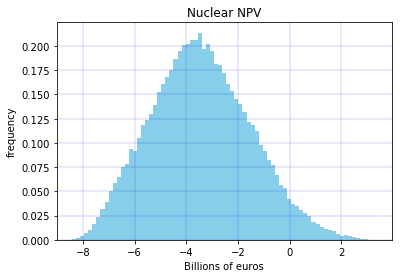

In [56]:
plt.hist(NPV_nuclearv, bins=75,density=True,color = ["skyblue"])
plt.title("Nuclear NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Nuclear_NPV_constructionperiod.png')
plt.show()

# Onshore wind power NPV histogram
https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf

In [57]:
#Wind parameters
It0=1500  #Euros/kW
n=25      #years
cf=0.25
r=0.04    #Discount rate
OMkwh=0.005  #Euros/kWh variable O&M
OMfixed=30   #Euros/kW fixed O&M
wholesale_price=80  #Euros/MWh
construction_period=4   #years...rounded to integer here

In [58]:
#sample over bunch of parameters
NPV_windv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=1500
Itmax=2000
wholesalemin=20
wholesalemax=80
cfmin=0.2
cfmax=0.37
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    cf=np.random.uniform(low=cfmin,high=cfmax)
    NPV_windv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

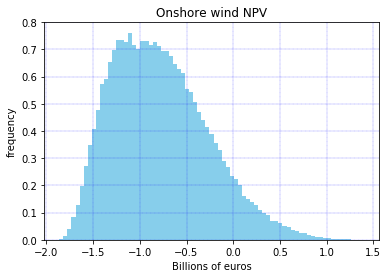

In [59]:
plt.hist(NPV_windv, bins=75,density=True,color = ["skyblue"])
plt.title("Onshore wind NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Wind_NPV.png')
plt.show()

# Photovoltaics Germany NPV histogram
https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf

In [60]:
#Photovoltaics parameters
It0=1400  #Euros/kW
n=25      #years
cf=0.1
r=0.04    #Discount rate
OMkwh=0.0  #Euros/kWh variable O&M
#OMfixed=30   #Euros/kW fixed O&M...for solar given as a percentage of capex
wholesale_price=80  #Euros/MWh
construction_period=3

In [61]:
#sample over bunch of parameters
NPV_solarv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=600
Itmax=1400
wholesalemin=20
wholesalemax=80
cfmin=0.09
cfmax=0.12
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    OMfixed=0.025*It0   #2.5% of capex
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    cf=np.random.uniform(low=cfmin,high=cfmax)
    NPV_solarv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

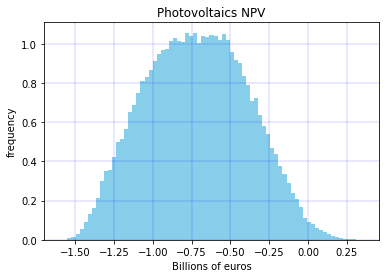

In [62]:
plt.hist(NPV_solarv, bins=75,density=True,color = ["skyblue"])
plt.title("Photovoltaics NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Solar_NPV.png')
plt.show()

# Offshore wind Germany NPV histogram
https://www.ise.fraunhofer.de/content/dam/ise/en/documents/publications/studies/EN2018_Fraunhofer-ISE_LCOE_Renewable_Energy_Technologies.pdf

In [63]:
#Offshore wind parameters
It0=3100  #Euros/kW
n=25      #years
cf=0.37
r=0.04    #Discount rate
OMkwh=0.0  #Euros/kWh variable O&M
OMfixed=100   #Euros/kW fixed O&M...for solar given as a percentage of capex
wholesale_price=80  #Euros/MWh
construction_period=6

In [64]:
#sample over bunch of parameters
NPV_owindv=np.zeros(samples)
rmin=0.04
rmax=0.1
Itmin=3100
Itmax=4700
wholesalemin=20
wholesalemax=80
cfmin=0.37
cfmax=0.51
for x in range(samples):
    It0=np.random.uniform(low=Itmin,high=Itmax)
    wholesale_price=np.random.uniform(low=wholesalemin,high=wholesalemax)
    r=np.random.uniform(low=rmin,high=rmax)
    cf=np.random.uniform(low=cfmin,high=cfmax)
    NPV_owindv[x]=NPV(construction_period,n,r,cf,It0,OMkwh,OMfixed,wholesale_price)/1000   #Billions for a GW plant

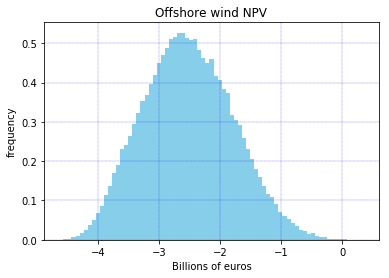

In [65]:
plt.hist(NPV_owindv, bins=75,density=True,color = ["skyblue"])
plt.title("Offshore wind NPV")
plt.xlabel("Billions of euros")
plt.ylabel("frequency")
plt.grid(color='b', linestyle='--', linewidth=0.25)
plt.savefig('Offshore_wind_NPV.png')
plt.show()